In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split

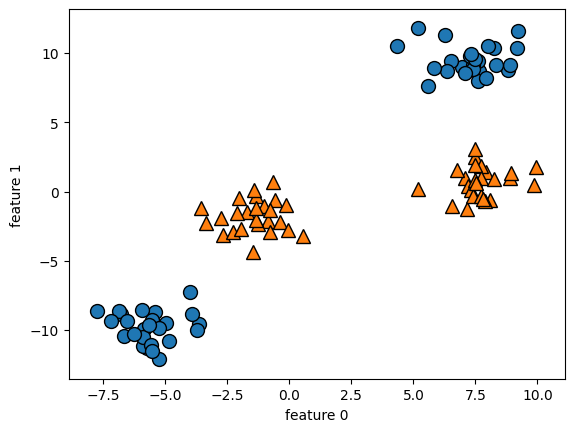

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=8)

y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

plt.show()

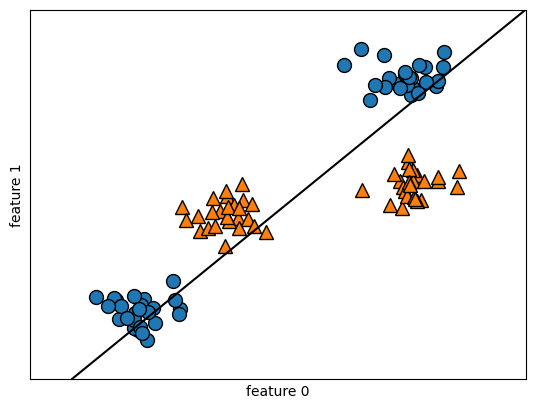

In [3]:
# linear models for classifictaion won't work well on this set since no line can separate groups
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X,y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.show()

/tmp/ipykernel_385134/3866532568.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/tmp/ipykernel_385134/3866532568.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


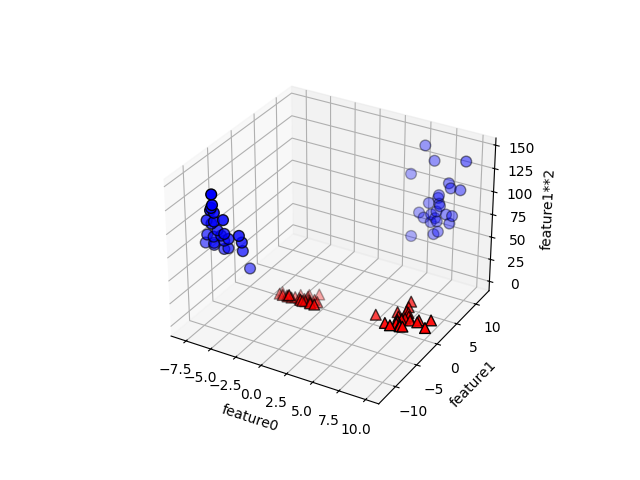

In [4]:
# add square of the 2nd feature as an input feature feature1 ** 2

%matplotlib widget

X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d

figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')
mask = y == 0
ax.scatter(
    X_new[mask, 0],
    X_new[mask, 1],
    X_new[mask, 2],
    c='b',
    cmap=mglearn.cm2,
    s=60,
    edgecolor='k',
)
ax.scatter(
    X_new[~mask, 0],
    X_new[~mask, 1],
    X_new[~mask, 2],
    c='r',
    marker='^',
    cmap=mglearn.cm2,
    s=60,
    edgecolor='k',
)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1**2")


plt.show()

In [5]:
# now we can use linear SVC
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
(coef, intercept)

(array([ 0.12923289, -0.21791697, -0.05935616]), array([1.17022536]))

/tmp/ipykernel_385134/1344616278.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/tmp/ipykernel_385134/1344616278.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


Text(0.5, 0, 'feature1 **2')

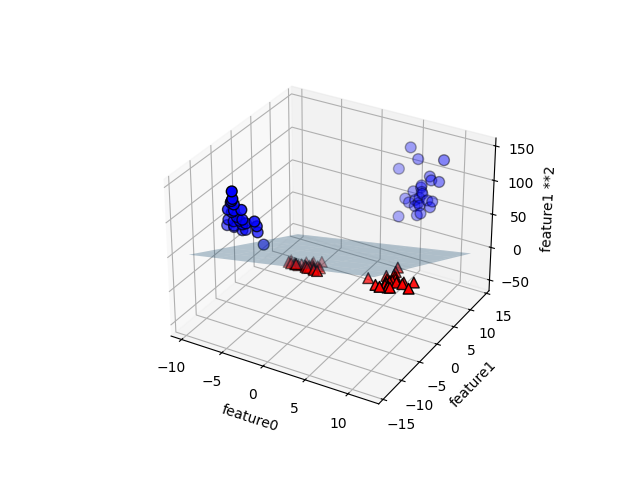

In [6]:
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

ax.scatter(
    X_new[mask, 0],
    X_new[mask, 1],
    X_new[mask, 2],
    c='b',
    cmap=mglearn.cm2,
    s=60,
    edgecolor='k',
)
ax.scatter(
    X_new[~mask, 0],
    X_new[~mask, 1],
    X_new[~mask, 2],
    c='r',
    marker='^',
    cmap=mglearn.cm2,
    s=60,
    edgecolor='k',
)

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 **2")
    

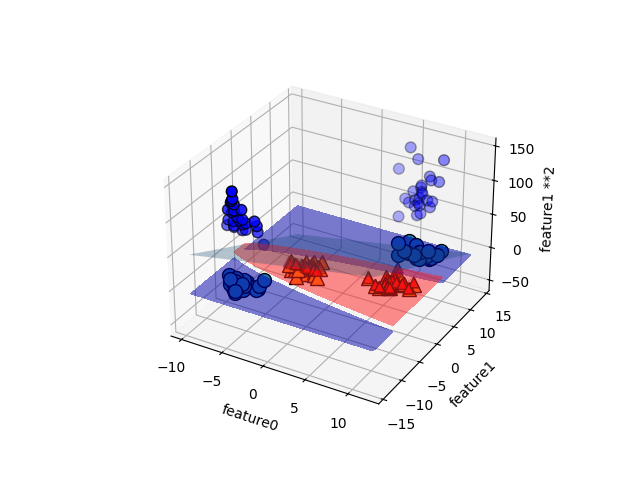

In [7]:
# as a functon of the original features the linear SVM model is an ellipse
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(
    np.c_[
        XX.ravel(),
        YY.ravel(),
        ZZ.ravel(),
    ],
)
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature0")
plt.ylabel("feature1")
plt.show()